# Reinforcement Learning: Walkthrough (No Coding)
In this part of the project, we will be using OpenAI's gym API for various reinforcement learning exercises.

In this part of the project, we will explore each of the following topics:

1. **Control, Agents, and Expanding on EECS16A/B** (1 Hour)
    * The Control Problem
    * States, Actions, Rewards, Values
    * Reinforcement Learning
    * Introduction to OpenAI Gym API
2. **Looking at Some Action-Value Policy Approaches**(1 Hour)
    * Simple World
    * Taxi World
    * Random-Policy Agent
    * Q-Learning Agent
 
4. **Optional: Extra for Experts**    
    * Value Iteration
    * Policy Extraction
    * Policy Iteration
    * Policy Evaluation
    
The majority of the time you will be spending on this project will be in visualizing different agents solve environments. Throughout this notebook, you will be asked to reflect on various demonstrations. 

## Part 1: Control, Agents, and Expanding on EECS 16A/B (1 hour)

### The Control Problem

In EECS 16A/B, we looked at ideas of control in building the robotic car. In that classic EECS 16AB problem, we implemented a controller for a robotic car that kept the car on a straight path despite differences in the motors and turned correctly each time. 

In a lot of situations, we would like to implement controllers for complex systems like robots and autonomous systems. Using Reinforcement Learning, we can implement decision making algorithms and controllers for complex systems by allowing the agent (the decision maker) to explore and learn how to act in different situations.

In this problem, we will introduce reinforcement learning using the OpenAI Gym API, an API that lets us easily train, visualize, and test learning agents in different environments. The majority of this problem will be providing a background for reinforcement learning without diving too deeply into the details. 

### Agents, States, Actions, Rewards, and Values

Before we dive into the OpenAI Gym API and visualizing reinforcement learning agents, lets review some terms you've likely seen in other projects you've done this semester. 

In previous sections on search, minimax, and so forth, you have learned about agents. To refresh your memory, the <b> agent is the decision-maker </b>. Our goal in Reinforcement Learning is to train the agent to learn the optimal behavior. The agent exists in the environment, and at any one time step (let's consider discrete time for now),  the environment exists in a <b>state</b>.

Recall the idea of the state-space that you've seen earlier. Here, we represent states as a vector of the relevant attributes of the system or environment.

Now, instead of implementing control loops or complex sets of rules telling the agent what to do, we want to let the agent explore the environment by moving from state to state to learn how to act. The agent moves from state to state in the environment by taking <b>actions</b>. The agent chooses which actions to take based on rewards.

Rewards are a key idea. The agent receives a <b>reward</b> when it takes an action. We can structure the rewards in such a way that the agent will learn the behavior we want it to learn. So going back to the robotic car, if we wanted the robotic car to learn how to go straight, we would give it a high reward if it chose actions that made the car go straight. Using this methodology, we can incentivize the agent to learn how to act to maximize the reward it achieves!

Let's take a look at two environments using the OpenAI Gym API, and demonstrate the power of reinforcement learning. Read the cells below, and run the cells.

### OpenAI Gym API
The OpenAI Gym API provides an easy way for students and researchers to test out their Reinforcement Learning agents in pre-specified environments. The API also provides a framework to build your own environments to train your agents on. Throughout this project, you will be using the OpenAI Gym API. Here's a quick tutorial: 

### Introduction to OpenAI Gym Through Chain World

To create chain world, we built our own environment using the OpenAI Gym API. An environment is its own simulated world where RL agents can explore, learn, and reap rewards. Every environment is defined just as we would define an MDP -- with states, action spaces, slippage probabilities (transition functions), rewards, etc.

Please take a few minutes to look over the various environments included in the API at this link: [OpenAI Environments](https://gym.openai.com/envs/#classic_control). 

**Please carefully follow the code in the cells below and read the comments to get a full picture of the API you will be using throughout this part of the project.**

In [3]:
# Importing gym
import gym

# Installing the chain world environment
# If this is failing, please try reinitializing the notebook in the project folder and not this specific problem folder.
!pip install cmake .



Processing /Users/jsboygenius/Downloads/MehtaKnights-189/prob1/gym-note4-mdp
  Created wheel for gym-note4-mdp: filename=gym_note4_mdp-0.0.1-py3-none-any.whl size=1067 sha256=5ed558698d65e6a72beaf2729fc2bc1f0017ed0b27d0f1f11d041e76db7f7409
  Stored in directory: /Users/jsboygenius/Library/Caches/pip/wheels/ef/fa/b4/2c46177bfe4606ed81acc5de64062061740302a991a3c8114f
Successfully built gym-note4-mdp
  Attempting uninstall: gym-note4-mdp
    Found existing installation: gym-note4-mdp 0.0.1
    Uninstalling gym-note4-mdp-0.0.1:
      Successfully uninstalled gym-note4-mdp-0.0.1


In [4]:
# Importing chain world environment
import gym_note4_mdp

import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [5]:
# Making the environment
chain_env = gym.make('note4-mdp-v0')

In [3]:
# Let's take a look at this environment
chain_env.render()

Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        


Using the `render()` function, you can visualize the chain world environment. This visualization has different parts. The _Environment_ part shows the agent in the environment. The agent is the yellow rectangle.

**Let's go over the specifics of the chain world as we are learning the API. Look to the code blocks for specific functions.**

### Chain World

This is a simple environment which represents a chain of states. 

#### States

The states are 0, 1, 2, 3, and 4 and they correspond to the position of the agent (the yellow rectangle) in the chain. Initially the agent starts deterministically at State 2. Verify that the setup makes sense by running the cell below.

In [4]:
# The env.reset() method reinitializes the env to default values
chain_env.reset()
chain_env.render()
# We can access the environments's current state by using env.state
print(f"Agent's current state: {chain_env.state}")

Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        
Agent's current state: 2


#### Actions

In the chain world, there are three actions that the agent can take:
     
* (1) forward, which moves the agent forward along the chain
* (0) backward, which moves the agent backward along the chain
* (2) exit, which tries to exit the world

The cell below will show you how to make actions using the `step(action)` function and will take you through one episode where the agent goes forward, backward, backward, backward, and then exits with reward +10.

In [5]:
chain_env.reset()
chain_env.discount_factor = 1
done = False

chain_env.slip = 0 # This is the probability of the agent slipping
print("Frame 1: Initial State")
chain_env.render()

state, reward, done, _ = chain_env.step(1) # .step(action) function takes an action on the environment
print(f"\nFrame 2: Agent moves forward to state {state} and receives reward {reward}")
chain_env.render()

state, reward, done, _ = chain_env.step(0) # moves backward
print(f"\nFrame 3: Agent moves backward to state {state} and receives reward {reward}")
chain_env.render()

state, reward, done, _ = chain_env.step(0) # moves backward
print(f"\nFrame 4: Agent moves backward to state {state} and receives reward {reward}")
chain_env.render()

state, reward, done, _ = chain_env.step(0) # moves backward
print(f"\nFrame 5: Agent moves backward to state {state} and receives reward {reward}")
chain_env.render()

state, reward, done, _ = chain_env.step(2) # exits
print(f"\nFrame 6: Agent moves exit to state {state} (terminal state) and receives reward {reward}")
chain_env.render()



Frame 1: Initial State
Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        

Frame 2: Agent moves forward to state 3 and receives reward 0
Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        

Frame 3: Agent moves backward to state 2 and receives reward 0
Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        

Frame 4: Agent moves backward to state 1 and receives reward 0
Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        

Frame 5: Agent moves backward to state 0 and receives reward 0
Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        

Frame 6: Agent moves exit to state 5 (terminal state) and receives reward 10
Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        


#### (Optional) Transition Functions

From any state, the agent can try to move fowards (1), move backwards (0), or exit (2). But there is no guarantee that the agent will succeed. You can imagine that chain world is a slippery place. The transitions are not determistic. If you choose to go forwards, you could slip and go backwards with some probability and vice versa. Also, if the agent tries to exit from any state other than the 0 or 4, nothing will happen because that is not valid action.


In [6]:
chain_env.reset()
chain_env.slip = 0
print(f"Slippage probability in deterministic world: {chain_env.slip}")
chain_env.reset() # By default the world is uncertain
print(f"Slippage probability in uncertain world: {chain_env.slip}")
# We can also verify the slippage probability experimentally. Convince yourself that 0.2 is the slip rate.
slip_counts = []
for j in range(10):
    slip_count = 0
    for i in range(100):
        chain_env.reset()
        prev_state = chain_env.state
        chain_env.step(0) # Move backwards
        if chain_env.state >= prev_state:
            slip_count += 1
    slip_counts.append(slip_count/100)
print(f"Experiment Measured slip rates: {slip_counts}")

Slippage probability in deterministic world: 0
Slippage probability in uncertain world: 0.2
Experiment Measured slip rates: [0.28, 0.22, 0.22, 0.15, 0.2, 0.22, 0.24, 0.25, 0.15, 0.24]


#### Rewards
At the beginning of the chain (State 0) there is a big reward of +10 (B) that the agent will be rewarded if it chooses to exit (Action 2) when in State 0.

At the end of the chain (State 4) there is a small reward of +1 (S) that the agent will be rewarded if it chooses to exit (Action 2) when in State 4.

In [7]:
chain_env.reset()
print(f"Small Reward: {chain_env.small}")
print(f"Big Reward: {chain_env.large}")

Small Reward: 1
Big Reward: 10


#### (Optional) Discount Factor
    
The discount factor is $\gamma = 0.1$. So as we take steps the rewards are discounted such that $${reward_{t+1}} = {reward_t}*{\gamma}$$ 

Observe what happens to the small and large rewards as we take steps in the cells below for various discount factors.

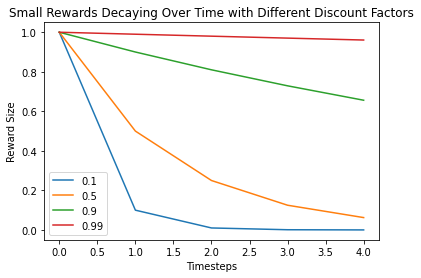

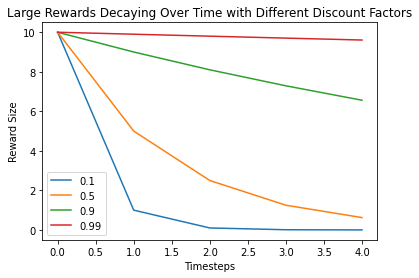

In [8]:
chain_env.reset()
discount_factors = [0.1, 0.5, 0.9, 0.99]
small_rewards = []
large_rewards = []
for j in range(len(discount_factors)):
    discount_factor = discount_factors[j]
    chain_env.reset()
    chain_env.discount_factor = discount_factor
    
    smalls = []
    larges = []
    smalls.append(chain_env.small)
    larges.append(chain_env.large)
    for i in range(1, 5):
        action = chain_env.action_space.sample() #This lets us randomly sample an action
        chain_env.step(action)
        smalls.append(chain_env.small)
        larges.append(chain_env.large)
        
    small_rewards.append(smalls)
    large_rewards.append(larges)


plt.figure()
steps = range(5)
for i in small_rewards:
    plt.plot(steps, i)

plt.title("Small Rewards Decaying Over Time with Different Discount Factors")
plt.ylabel("Reward Size")
plt.xlabel("Timesteps")
plt.legend(discount_factors)

plt.figure()
for i in large_rewards:
    plt.plot(steps, i)

plt.title("Large Rewards Decaying Over Time with Different Discount Factors")
plt.ylabel("Reward Size")
plt.xlabel("Timesteps")
plt.legend(discount_factors)

## Taxi World

Now that you've gotten a chance to familiarize yourself with the OpenAI Gym API and the simple chain world environment, let's take a look at a more complicated (albeit still very simple) environment we call Taxi World.

After looking at the Taxi World in depth, you will look at a "dumb agent" that chooses moves randomly for Taxi World and Chain World that will serve as a baseline for better agents we look at later on.

In [9]:
# Install packages
import numpy as np
!pip install cmake 'gym[atari]' scipy -q

In [10]:
# Make the taxi world environment
taxi_env = gym.make("Taxi-v3").env
# Render the environment using the OpenAI Gym API
## Your code here ## (Ans: env.render())
taxi_env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Describing Taxi World 

In the Taxi World, the agent is a taxi cab. In the visualization, the taxi cab is the yellow rectangle. The Taxi World has walls, represented by | and the taxi agent cannot go through these walls. The Taxi World also has pickup/dropoff locations represented by the letters (R, G, Y, B) in the visualization. 

In each run of Taxi World, the taxi agent must pickup a passenger at the blue letter location, transport them to the pink letter location, and dropoff the passenger at the pink letter location.

When the Taxi has picked up a passenger, its color will change from yellow to blue.

Formally, we can represent this in terms of the states, actions, and rewards.

* **States**
    * The Taxi World environment has many more states than the Chain World environment. For the chain world, it was relatively easy to see that the chain world had 6 states (0, 1, 2, 3, 4, terminal state), but how would we figure out the number of states in the Taxi World?
    * How many possible locations are there for the taxi agent?
        * The taxi world is a 5x5 grid so there are 25 possible locations.
    * For each location of the taxi, how many possible passenger locations are there?
        * There are 4 possible passenger locations if the passenger has not yet been picked up and 1 possible passenger location if the passenger has been picked up. This gives us a total of 5 passenger locations.
    * For each location of the taxi and passenger location, how many drop off locations are there?
        * There are still 4 possible drop off locations
    * How many total states are there? What is the size of the state space?
        * So, in total there are $5*5*5*4 = 500$ states in this world! That's a lot more than there were in the chain world!  

* **Actions**
    * 0: south
    * 1: north
    * 2: east
    * 3: west
    * 4: pickup
    * 5: dropoff

* **Rewards**
    * Movement actions have reward -1.0. A negative reward makes moving costly. This makes sense, because the taxi agent should be incentivized to pickup and dropoff passengers as efficiently as possible.
    * Pickup/dropoff actions have reward -10 if the taxi agent is not at a pickup or dropoff location. This is a large penalty.
    * At dropoff/pickup locations, dropoff and pickup would have higher rewards (+20), if the agent succeeds in picking up and dropping off the passenger at the correct locations.

## Visualization Exercise: Random Agents

In this visualization exercise, you will be looking at a random agent. While this agent has not reached a terminal state (signified by the variable `done`), it will continue making random actions. This is a really bad controller! It just moves around randomly! It sometimes stumbles into the right state and receives rewards, but lets visualize just how bad this agent is as a baseline.

In [11]:
def random_agent(env):
    frames = []
    actions_taken = 0
    total_reward = 0
    done = False
    
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        total_reward += reward
        actions_taken += 1
        
        frame = env.render(mode='ansi')
        frames.append({
            'frame': frame,
            'state': state,
            'action': action,
            'reward': reward,
            'total reward': total_reward
            }
        )
    return frames, actions_taken, total_reward
    
## Utils Functions to Run and Visualize ## 
# Source: see reference [1]
from IPython.display import clear_output
from time import sleep

def print_frames(frames, t=0.1, time=True):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        if time:
            print(f"Time: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Total Reward: {frame['total reward']}")
        sleep(t)

In [12]:
taxi_env.reset()
frames, actions_taken, total_reward = random_agent(taxi_env)
print("Actions taken: {}".format(actions_taken))
print("Total Reward: {}".format(total_reward))

Actions taken: 2257
Total Reward: -8725


### Visualize
Run the code cell below to visualize the random agent in the environment!

In [13]:
# Hit ctrl-c to interrupt this if you would rather not watch the agent the whole time
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Time: 1001
State: 288
Action: 1
Reward: -1
Total Reward: -3953


KeyboardInterrupt: 

**Check your understanding**: What can you say about the random agent in the Taxi world? About how many actions does the taxi agent take before picking up the passenger for the first time? How many actions does the random agent take before finally stumbling into the terminal state? How much reward does it incurr in total? Do you think we can do better?


The terrible performance of this random agent should motivate our study of reinforcement learning. The random agents performance in our taxi world will serve as our baseline for future agents we write.

The moral of this exercise is that we can do better! We can do better by learning from our experience.

## Visualization Exercise: Reinforcement Learning Agents

Let's take a look at a Reinforcement Learning Agent (specifically a Q-Learning Agent) and see how great it is as learning what to do! Run the cells below and visualize the q-learning agent.

In [14]:
def q_learning_agent(env, alpha=0.1, gamma=0.6, epsilon=0.1):

    q_table = np.zeros([env.observation_space.n, env.action_space.n])

    for i in range(1, 100001):
        env.reset()
        state = env.s
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() 
            else:
                action = np.argmax(q_table[state]) 

            next_state, reward, done, _ = env.step(action) 

            next_value = np.max(q_table[next_state])
            old_state_value = q_table[state, action]

            q_table[state, action] = (1 - alpha) * old_state_value + alpha * (reward + gamma*next_value)
            
            state = next_state
            
    return q_table

env = gym.make("Taxi-v3").env
q_table = q_learning_agent(env)

In [15]:
## Let the agent exploit its policy. ##
episodes = 10 # You can change the number of episodes if you'd like to admire your agent for more or less time.
frames = []

for _ in range(episodes):
    env.reset()
    state = env.s
    reward = 0
    total_reward = 0
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _ = env.step(action)
        total_reward += reward
        
        frame = env.render(mode='ansi')
        frames.append({
            'frame': frame,
            'state': state,
            'action': action,
            'reward': reward,
            'total reward': total_reward
            }
        )


In [16]:
# Run this cell to visualize the q-learning agent.
print_frames(frames, t=0.2, time=False)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

State: 85
Action: 5
Reward: 20
Total Reward: 10


Wow! This is awesome! You should be able to see the q-learning agent initialize in a random state and quickly move toward the pickup location to pickup the passenger and then quickly move to the drop off location to dropoff the passenger before being reinitialized! Hopefully this project was a fun exercise to see the power of RL in some simple examples. In the next part of the project, we'll be going through some 2D physics RL examples with continuous observation spaces!

## (Optional) Extra for Experts: Solving MDPs, Policy, Value Iteration, Policy Iteration, Policy Evaluation, and Policy Improvement, Offline Learning, Online Learning

This material is all information we believe is necessary to look at to truly understand the underlying phenomena of reinforcement learning agent above. Feel free to read through this section.

Now, we will take a closer look at the following topics: 
* Policies
* The Bellman Equation
    * Values $V^*(s)$
    * Q-Value $Q^*(s, a)$
* Value Iteration
* Policy Extraction
* Policy Iteration
* Policy Evaluation

Each of the exercises you will do in this part will include reviewing the material, implementing the producedure in python, and seeing the results on the chain world and the taxi world. Let's get started.

### Policy

Our goal in studying MDPs was to model the environment. We motivated MDPs by proclaiming that modeling the environment would help us use algorithms to learn the best strategies and optimal behavior. But what does it mean to behave optimally?

To behave optimally is to follow the best **policy**. A **policy** is a mapping from states to actions. The policy is like the agent's intelligence, it tells the agent what action to take given a state. 

Now, it should be clear that our goal is to find the optimal policy. The optimal policy is the policy that will give the agent the maximum expected total reward in the environment. 

Let's take a look at two policies in the chain world and in the cell below compare the two policies. 

#### Student Exercise: Test out different policies in the MDP provided
In the code cell below we have defined two policies, policy1 and policy2. Run the code cell with policy1 first and note how the agent moves through the world while following this policy, also note the total reward this policy yields the agent. Do the same for policy2. Which policy is better? After you have evaluated policy1 and policy2, write your own policy!

In [17]:
chain_env.reset()
print(f"discount factor is: {chain_env.discount_factor}")

## COMPARING POLICY CODE ##

FORWARD = 1
BACKWARD = 0
EXIT = 2
total_reward = 0
done = False

# Notice how the policy is a mapping from states --> actions
policy1 = {0: EXIT, 1: BACKWARD, 2: FORWARD, 3: FORWARD, 4: EXIT, 5:EXIT}
policy2 = {0: EXIT, 1: BACKWARD, 2: BACKWARD, 3: BACKWARD, 4: EXIT, 5: EXIT}
policy3 = {} ## <- ENTER YOUR POLICY HERE ##

chain_env.state = 2 ## <- TODO: CHANGE THE STARTING STATE ##

frames = [{'frame': chain_env.render(mode='ansi'),'state': state,'action': action,'reward': reward, 'total reward':0}]

#Change the line below to change the policy from 1 to 2 to 3
policy = policy1 ## <- TODO: CHANGE THE POLICY ##

while not done:
    # Make sure the following 3 lines make sense!
    current_state = chain_env.state
    action = policy[current_state] 
    state, reward, done, _ = chain_env.step(action)
    
    total_reward += reward
    frames.append({'frame': chain_env.render(mode='ansi'),'state': state,'action': action,'reward': reward, 'total reward':total_reward})    
## RUN THE CELL BELOW TO VISUALIZE THE AGENT EXECUTING THE POLICY

discount factor is: 0.1


In [18]:
## Run this cell to visualize
print_frames(frames, t=0.6) # You may see the agent not follow the policy! Why? Remember uncertainity?

Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        

Time: 4
State: 5
Action: 2
Reward: 0.0010000000000000002
Total Reward: 0.0010000000000000002


So, while it is nice to manually choose polcies or to think about optimal policies and manually implement them as we did above, in difficult problems or in complicated MDPs this is not possible nor efficient.   

Let's see how algorithms can come up with optimal policies for our agents to use! To start our exploration, let's derive the bellman equation. The bellman equation forms the corner stone for a lot of what we will be doing. You can also refer to the note for a more in depth explanation.

### Bellman Equation

First, it is important to understand two quantities: $V^*(s)$ and $Q^*(s, a)$.

1. $V^*(s)$ is the expected value of the reward that an optimally behaving agent starting in state s will receive over its entire lifetime.[2]  $V^*(s)$ is the maximum reward an agent following an optimal **policy** will achieve over its lifetime.

2. $Q^*(s, a)$ is the expected value of the reward that an optimally behaving agent starting in q-state (s,a) will receive over its entire lifetime. $Q^*(s, a)$ is the maximum reward an agent following an optimal **policy** will achieve over its lifetime given that it started in state s and has taken action a.

The Bellman Equation provides an equation for $V^*(s)$ and $Q^*(s, a)$ in terms of simpler quantities. Let's derive this equation.

If you were an agent and you knew $V^*(s)$ for all states, and you were in a state $s$, how would you choose which action to take?

If you were reward maximizing, you would take the action that leads you to the state  $s'$ with the maximum $V^*(s')$. Why? Because, by definition this would maximize the total reward you would receive if you continued acting optimally.

But, remember, there is uncertainty in the MDP, so each action comes with a probability that you will transition to any state, namely, $T(s, a, s')$ so you would like to choose the action that maximizes your _expected_ future reward. 

Let's put this into a mathematical equation. This is the Bellman Equation.

 $$V^*(s) = \max_{{a \in actions}}{\sum_{s'}T(s, a, s')[R(s, a, s') + \gamma*V^*(s')]}$$
 
 Notice that this equation exactly follows our thinking. The optimal value of a state is the probability weighted reward the agent receives in transitioning from state s to s' and the maximum expected optimal value of the next state s' (discounted by gamma). This is a beautifully simple equation, that decomposes the quantity $V^*(s)$ into subproblems $V^*(s')$.
 
 Similarly, $$Q^*(s, a) = {\sum_{s'}T(s, a, s')[R(s, a, s') + \gamma*V^*(s')]}$$ since in a q-state we are given an action, so there is no maximization over the actions.
 
 Putting the two equations together we have, 
     $$V^*(s) = \max_{{a \in actions}}Q^*(s, a)$$
     
While these elegant equations put represent the optimal values and q-values of states in terms of other states' optimal values and q-values, how would we go about solving for the optimal values and q-values? Enter value iteration!

### Value Iteration

Notice that the Bellman equation will only be satisfied if for every state $V(s) = V^*(s)$ where $V(s)$ is the value of a state s and $V^*(s)$ is the optimal value of a state s.

In other words the bellman equation does not hold if the values that we have assigned to a state do not match the optimal values. Because of this feature, we can use the bellman equation to tell us whether our values are optimal.

The idea of value iteration, is to iteratively improve our estimates of the values of each state until we have learned the true optimal values. The key subproblem that we will use to solve for $V^*(s)$ is $V_k(s)$.

$V_k(s)$ is the expected value of the reward that an optimally behaving agent starting in state s will receive over the next k timesteps. Remember, $V^*(s)$ is the expected value of the reward that an optimally behaving agent starting in state s will receive over its entire lifetime.

When, $V_k(s) = V_{k+1}(s) = ... = V_{k+i}(s) = ... = V^*(s)$ the value for a state will have converged and we will have found the optimal value of a state s.

By expanding our time horizon (increasing k) until convergence we can iteratively find $V^*(s)$. What does the algorithm look like?

1. For all states, initialize $V_0(s) = 0$.
2. Repeat the following while $V_k(s) \neq V_{k+1}(s)$,
    $$V_{k+1}(s) \leftarrow \max_{{a \in actions}}{\sum_{s'}T(s, a, s')[R(s, a, s') + \gamma*V_k(s')]} $$
    
Let's implement this for our chain world!

#### Helpful functions

There is one last part of the OpenAI gym API that we haven't showed you yet, the MDP table. The MDP table stores all the information about the environment in an accessible way. A demo on how to access important information follows. 

In [19]:
# Viewing The MDP table
print(chain_env.P)

{0: {0: [(0.8, 0, 0, False), (0.2, 1, 0, False)], 1: [(0.8, 1, 0, False), (0.2, 0, 0, False)], 2: [(1, 5, 10, True)]}, 1: {0: [(0.8, 0, 0, False), (0.2, 2, 0, False)], 1: [(0.8, 2, 0, False), (0.2, 0, 0, False)], 2: [(1, 1, 0, False)]}, 2: {0: [(0.8, 1, 0, False), (0.2, 3, 0, False)], 1: [(0.8, 3, 0, False), (0.2, 1, 0, False)], 2: [(1, 2, 0, False)]}, 3: {0: [(0.8, 2, 0, False), (0.2, 4, 0, False)], 1: [(0.8, 4, 0, False), (0.2, 2, 0, False)], 2: [(1, 3, 0, False)]}, 4: {0: [(0.8, 3, 0, False), (0.2, 4, 0, False)], 1: [(0.8, 4, 0, False), (0.2, 3, 0, False)], 2: [(1, 5, 1, True)]}, 5: {0: [(1, 5, 0, True)], 1: [(1, 5, 0, True)], 2: [(1, 5, 0, True)]}}


In [20]:
# Woah that's a lot
# The MDP table stores the following information for each state:
# {action1: [(probability1, nextstate1, reward1, done1), (probability2, nextstate2, reward2, done2)], 
# action2: [(probability, nextstate, reward, done)], etc}

# This the the entry for state 1.
chain_env.P[1]

{0: [(0.8, 0, 0, False), (0.2, 2, 0, False)],
 1: [(0.8, 2, 0, False), (0.2, 0, 0, False)],
 2: [(1, 1, 0, False)]}

In [21]:
# The first row tells us what would happen if we took action 0 (backwards) from this state,
# The second row tells us what would happen if we took action 1 (forwards) from this state,
# The third row tells us what would happen if we took action 2 (exit) from this state

# Let's look at what the first row is telling us.
state = 1
action = 0
print(chain_env.P[state][action])
# > [(0.8, 0, 0, False), (0.2, 2, 0, False)]

# The first entry tells us that there is a 0.8 probability of transitioning to nextstate 0, receiving reward 0, and not entering a terminal state
# The second entry tells us that there is a 0.2 probability of transitioning to nextstate 2, receving reward 0, and not entering a terminal state
# This should make sense to you. Remember the probability of slipping is 0.2.

# This is useful because it gives us the T(s,a,s') and R(s,a,s') for every state and action.

[(0.8, 0, 0, False), (0.2, 2, 0, False)]


## Implementing Value Iteration

In this coding exercise, you will be viewing an implementation of value iteration for the chain world.

First, instantiate a table of zeroes called v_table of size num_iters by num_states (env.observation_space.n). The kth row of this table should contain the $V_k(s)$ values. 

|  $k$        | $V_k(0)$    | $V_k(1)$      | $V_k(2)$    | ... |
| :---        |    :----:   |          ---: |     ---:    | ---:|
|   0         |             |               |             |     |
|   1         |             |               |             |     |
|   2         |             |               |             |     |
|   ...       |             |               |             |     |
|   num_iters         |             |               |             |     |


Loop through possible actions and next states (s') and use the update rule to fill in the k+1th row of the table using the kth row of the table. This should follow from the update rule: 
$$V_{k+1}(s) \leftarrow \max_{{a \in actions}}{\sum_{s'}T(s, a, s')[R(s, a, s') + \gamma*V_k(s')]} $$

or, in tabular form/pseudocode,

`
new_value_for_state = max(sum(transition_prob*(reward + discount*old_value_for_nextstate)
`

Remember you can get the transaction probability and the reward from `env.P` and can get the old values of the state from the value table as you create it.



In [23]:
def value_iteration(env, num_iters):
    ## This is necessary because taxi environment has no discount factor
    try:
        discount_factor = env.discount_factor
    except:
        discount_factor = 1
        
    v_table = np.zeros([num_iters+1, env.observation_space.n])
    
    for k in range(0, num_iters):
        for state in range(env.observation_space.n):
            reward_for_action = []
            
            for action in range(env.action_space.n):
                reward_for_state = 0
                
                for entry in range(len(env.P[state][action])):
                    transition_probability, next_state, reward, done = env.P[state][action][entry]
                    reward_for_state += transition_probability*(reward + discount_factor*v_table[k][next_state])
                
                reward_for_action.append(reward_for_state)
                
            v_table[k+1][state] = np.max(reward_for_action)

    return v_table, num_iters

Now, let's visualize convergence of values for different number of iterations. Run the cell below and change the number of iterations to see the convergence of value iteration.

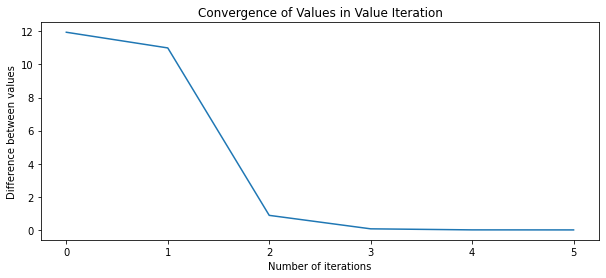

In [24]:
env = chain_env ## You can change this to taxi_env as well, but the taxi env is a larger environment so it will take more iterations.
num_iters = 5 ## Change this value
v_table, num_iters = value_iteration(env, num_iters)
env.reset()

def print_value_table(v_table, num_iters):
    for i in range(len(v_table[-1])):
        if i == 5:
            print(f"Value for terminal state after {num_iters} iterations = {v_table[-1][i]}")
        else:
            print(f"Value for State {i} after {num_iters} iterations = {v_table[-1][i]}")

def plot_convergence(v_table, num_iters):
    plt.figure(figsize = (10, 4))
    advantage = [np.sum([np.abs(v_table[i][j] - v_table[i-1][j]) for j in range(len(v_table[i]))]) for i in range(0, num_iters+1)]
    plt.plot(range(0, num_iters+1), advantage)
    plt.title("Convergence of Values in Value Iteration")
    plt.xlabel("Number of iterations")
    plt.ylabel("Difference between values")

# print_value_table(v_table, num_iters)
plot_convergence(v_table, num_iters)

### Policy Extraction

Now that we have the optimal values of each state for both taxi world and chain world, we would like to use these values to generate a policy. 

Remember a policy is like the agent's intelligence, given a state the policy will tell the agent what to do (what action to take). 

How would we extract a policy from the value table? With **policy extraction**, of course!

**Policy extraction** is a method which extracts the actions that make up our policy.

Again, let's logically reason through this. Given that you are in a state s, which action should you take? You should take the action which gives you the maximum expected total reward. Well, which action gives you the maximum expected total reward? If you remember the definition of a q-state from earlier. The action a that maximizes q(current state, a) will give you the biggest expected total utility. Going back to the bellman equation, this is: 

$$\pi^*(s) = \text{argmax}_{{a \in actions}}{\sum_{s'}T(s, a, s')[R(s, a, s') + \gamma*V^*(s')]}$$




In [25]:
def policy_extraction(env, v_star):
    '''v_star is an array with the optimal values of the states. It would be the last row of v_table.'''
    policy = {}

    for state in range(env.observation_space.n):
        reward_for_action = []
        for action in range(env.action_space.n):
            reward_for_state = 0
            for entry in range(len(env.P[state][action])):
                transition_probability, next_state, reward, done = env.P[state][action][entry]
                reward_for_state += transition_probability*(reward + discount_factor*v_star[next_state])
            reward_for_action.append(reward_for_state) 

        policy[state] = np.argmax(np.asarray(reward_for_action))
    
    return policy

Run the cell below to see if your policy makes sense.

In [26]:
env = chain_env
env.reset()
num_iters = 25
v_table, _ = value_iteration(env, num_iters) # The best values are in the last row of the v_table

def print_policy(env, policy):
    if env.observation_space.n > 10:
        print("We only print policies for chain world. If you want to, you can write your own code to print policy for taxi env.")
        return
        
    word = {0: "BACKWARDS", 1: "FORWARDS", 2: "EXIT"}
    for state in policy:
        if state != 5:
            action = policy[state]
            action = word[action]
            print(f"From state {state} take action {action} to maximize reward")

policy = policy_extraction(env, v_table[-1])
print_policy(env, policy)

From state 0 take action EXIT to maximize reward
From state 1 take action BACKWARDS to maximize reward
From state 2 take action BACKWARDS to maximize reward
From state 3 take action FORWARDS to maximize reward
From state 4 take action EXIT to maximize reward


Run the cells below to visualize the optimal policy that we learned through policy extraction!

In [27]:
# VISUALIZE POLICY IN ACTION
env = chain_env
env.reset()
num_iters = 25
v_table, _ = value_iteration(env, num_iters) 
policy = policy_extraction(env, v_table[-1])
total_reward = 0
# print_policy(env, policy)

frames = [{'frame': env.render(mode='ansi'),'state': env.s,'action': 0,'reward': 0, 'total reward':0}]

done = False
while not done:
    # Make sure the following 3 lines make sense!
    current_state = env.s
    action = policy[current_state] 
    state, reward, done, _ = env.step(action)
    
    total_reward += reward
    frames.append({'frame': env.render(mode='ansi'),'state': state,'action': action,'reward': reward, 'total reward':total_reward})    


In [28]:
print_frames(frames, t=0.5) #Verify that this policy is optimal! Run the cell above and this cell a couple of times to 
# verify that even when the agent slips it makes the correct decisions afterwards.

Environment
+---------+
|B: : : :S|
+---------+
+-+        
|T|        
+-+        

Time: 6
State: 5
Action: 2
Reward: 0.00010000000000000003
Total Reward: 0.00010000000000000003


So, in this section we extracted a policy from values we learned through value iteration. But what if we could learn our policy directly without learning the values first? Let's see how we could do this in the next section!

### Policy Iteration

The problem of value iteration is that it can be very slow. We have to learn all the values before we can learn the policy. **Policy iteration** improves on value iteration because we work directly to improve some initial policy until our policy converges to the optimal policy.

Here are the basic steps of the policy iteration algorithm.

1. Initialize the policy to an arbitrary policy. Remember a policy is simply a mapping between states and actions.

2. Repeat the following:
    * Evaluate the policy (**policy evaluation**) by computing the expected total reward of starting in state s and following policy $\pi$. This is represented by the following equation: $$V^\pi(s) = {\sum_{s'}T(s, \pi(s), s')[R(s, \pi(s), s') + \gamma*V^\pi(s')]}$$
        * We can compute this by iteratively updating until $V^\pi(s)$ converges. $$V^\pi_{k+1}(s) = {\sum_{s'}T(s, \pi_i(s), s')[R(s, \pi_i(s), s') + \gamma*V^{\pi_i}_k(s')]}$$
    * Then improve the policy (**policy improvement**) by running the policy extraction routine on the values of the states generated as a result of policy evaluation.
        * $$\pi_{i+1}(s) = \text{argmax}_{{a \in actions}}{\sum_{s'}T(s, a, s')[R(s, a, s') + \gamma*V^{\pi_i}(s')]}$$
    * We can continue this routine until the policy converges and the policy at time step i is the same as the policy in time step 
    
Implement the policy iteration algorithm below. Be sure to reference earlier parts, and try not to repeat yourself!

In [29]:
def policy_iteration(env, value_convergence_threshold=1e-04):
    initial_policy = get_initial_policy(env) #This method just gives you a random policy
    policy = initial_policy
    num_iters_before_convergence = 0
    
    policies_converged = False
    
    while not policies_converged:
        num_iters_before_convergence += 1
        v_table = np.zeros([100, env.observation_space.n])
        
        values_converged = False
        k = 0
        while not values_converged:
            for state in range(env.observation_space.n):
                reward_for_action = 0
            
                action = policy[state]
                
                for entry in range(len(env.P[state][action])):
                    transition_probability, next_state, reward, done = env.P[state][action][entry]
                    reward_for_action += transition_probability*(reward + env.discount_factor*v_table[k][next_state])
                
                v_table[k+1][state] = reward_for_action
            
                
            if np.all([np.abs(v_table[k+1][state] - v_table[k][state]) < value_convergence_threshold for state in range(env.observation_space.n)]):
                values_converged = True
            else:
                k += 1
        
        new_policy = policy_extraction(env, v_table[k+1])
        
        policies_converged = is_same_policy(policy, new_policy)
        policy = new_policy
  
    return policy, initial_policy, num_iters_before_convergence


### Useful Utils ###
def get_initial_policy(env, stable=False):
    # This will return an arbitrarily chosen initial policy
    if stable:
        return {0: 2, 1: 1, 2: 1, 3: 1, 4: 2, 5: 0}
    return {0: env.action_space.sample(), 1: env.action_space.sample(), 2: env.action_space.sample(), 3: env.action_space.sample(), 4: env.action_space.sample(), 5: env.action_space.sample()}
    
def is_same_policy(policy1, policy2):
    for state in policy1:
        if policy1[state] != policy2[state]:
            return False
    return True
    
policy, initial_policy, num_iters_before_convergence = policy_iteration(chain_env)
print(" Initial Policy:")
print_policy(chain_env, initial_policy)
print("\n Optimal Policy:")
print_policy(chain_env, policy)
print(f"\n Number of Iterations in Policy Iteration: {num_iters_before_convergence}")

 Initial Policy:
From state 0 take action EXIT to maximize reward
From state 1 take action FORWARDS to maximize reward
From state 2 take action EXIT to maximize reward
From state 3 take action BACKWARDS to maximize reward
From state 4 take action EXIT to maximize reward

 Optimal Policy:
From state 0 take action EXIT to maximize reward
From state 1 take action BACKWARDS to maximize reward
From state 2 take action BACKWARDS to maximize reward
From state 3 take action FORWARDS to maximize reward
From state 4 take action EXIT to maximize reward

 Number of Iterations in Policy Iteration: 2


If you run the code block above multiple times, and you have implemented policy iteration correctly, you should see that no matter the starting policy, policy iteration will learn the optimal policy we uncovered in the previous part in a few iterations!

By now you should have experience writing random moving agents, working with OpenAI gym API, and solving MDPs using value iteration, and learning optimal policies by hand and by using value iteration with policy extraction and policy iteration on the simple chain world.

### Offline vs Online Planning

What if we don't know the underlying MDP? Everything we have done so far assumes that the the agent has complete knowledge of both the transition function and the reward function. (We were directly accessing `env.P` the MDP table). This is called **offline planning** because the agent can learn an optimal policy without ever having to explore the world.

The assumption that the agent has knowledge of the reward and transition function is not reasonable in the real world and in many environments. In situations where the agents does not know the transition of reward function, the agent must **explore** the environment to learn the environment's intrinsics. This is called **online planning** and it will be the focus of the remainder of this part of the project.

There are two broad distinctions within online planning. The first category of algorithms is called **model based** and the second category is called **model free**. Let's take a closer look at both of these.

### Online Planning: Model-Based

In **model-based** learning algorithms, the agent tries to learn the underlying MDP through exploration. Essentially, the agent will simply maintain counts of the transitions and rewards it receives to build an approximation of the transition and reward functions. In other words, through exploration the agent will try to build the MDP table `env.P`.

This is a rather simple learning algorithm and while it is effective, it is rather boring, since you would just be essentially letting the random agent move through the environment and keeping counts of the rewards and transitions as the agent explores and then normalizing these counts at the end of learning. Then, the underlying MDP could be solved using value iteration and policy extraction or policy iteration.

### Online Planning: Model-Free

In **model-free** learning, the goal is to learn the policy directly without first estimating the intrinsics of the MDP (transition and reward functions). Let's first see how we can evaluate policies (**policy evaluation**) in a model-free learning scenario using **Direct Evaluation** and **Temporal Difference Learning**. Then, we will see how to learn the optimal policy through learning q-values in q-learning.

### Model-Free: Direct Evaluation

In **Direct Evaluation** the goal is to evaluate a policy by following it for some number of **episodes**. An **episode** is a single run on the environment from intitial state to terminal state. As the agent goes through multiple episodes of following the policy, it maintains counts of the total reward it received from each each state (in all future steps after that state) and a count for how many times each state was visited. 

From the total reward received from each state and the number of times the state was visited, the agent can estimate $V^\pi(s)$.

Specifically, $V^\pi(s) = \frac{\text{total reward}}{\text{times state 
visited}}$

Let's create a table that looks like the the table below and populate it with the results of running the agent on the environment following the specified policy.

| State       | Total Reward| Times Visited |  $V^\pi(s)$ |
| :---        |    :----:   |          ---: |     ---:    |
|   0         |             |               |             |
|   1         |             |               |             |
|   2         |             |               |             |
|   3         |             |               |             |
|   4         |             |               |             |

In [ ]:
def direct_evaluation(env, policy, episodes=10):
    table = np.zeros((env.observation_space.n, 3))
    TOTAL_REWARD_COL = 0
    TIMES_VISITED_COL = 1
    VALUES_COL = 2
    
    for i in range(episodes):
        env.reset()
        states_visited = []
        done = False
        
        next_state = env.state
        while not done:
            current_state = next_state
            states_visited.append(current_state)
            table[current_state][TIMES_VISITED_COL] += 1
        
            action = policy[current_state]
            next_state, reward, done, _ = env.step(action)
            
            for s in states_visited:
                table[s][TOTAL_REWARD_COL] += reward
    
    for state in table:
        state[VALUES_COL] = float(state[TOTAL_REWARD_COL])/max(0.0000001, state[TIMES_VISITED_COL])
    
    return table

In [ ]:
# Run this cell to visualize
env = chain_env
env.reset()
random_policy = get_initial_policy(env, stable=True)
table = direct_evaluation(env, random_policy)

def print_direct_eval_table(table):
    i = 0
    print("Direct Evaluation Table:")
    print("{:<8} {:<25} {:<15} {:<10}".format("state", "total reward", "times visited", "value"))
    for state in table:
        print("{:<8} {:<25} {:<15} {:<10}".format(i, state[0], state[1], state[2]))
        i+=1
print("Policy:")
print_policy(env, random_policy)
print("")
print_direct_eval_table(table)    

So, this is one way to do policy evaluation without a model. Remember, we can always use policy evaluation along with policy improvement to iteratively improve our model. Let's take a look at another way to do model free policy evaluation!

### Model-Free: Temporal Difference Learning

While, Direct Evaluation was very simple to understand and implement, there are some inconsistencies in the logic behind direct evaluation. Firstly, direct evaluation does not learn as it follows the policy, it simply collects information, and then, after reaching a terminal state, in combines all of this information into something it can learn from. While this model can work, in practice it would take much too long. Why don't we learn after each move?

This is where temporal difference learning comes in. In temporal difference learning, the agent has a running estimate of each state's optimal value which it updates using new samples as it collects them. 

Let's see the procedure the agent follows and then we'll take it apart before implementing it.

1. For all states s, set $V^\pi(s) = 0$ to start.
2. While the number of episodes of exploration have not finished:
    * According to the agent's policy $\pi$, take an action and receive reward $R(s, a, s')$.
    * With this reward, construct a sample: $\text{sample} = R(s, a, s') + \gamma*V^\pi(s')$, this sample is a new estimate of $V^\pi(s)$.
    * Update $V^\pi(s)$ using the update rule: $$V^\pi(s) \leftarrow (1 - \alpha)*V^\pi(s) + \alpha*\text{sample}.$$
    * As you progress, shrink $\alpha$ as a function of the number of times we enter a state s'. (You do not have to implement this step.)
    * If you reach a terminal state, increment the number of episodes, reset the environment, and continue learning.
    
The most important aspect of this is the update rule. The update rule captures the sentiment that motivated us to move away from direct evaluation. We are now learning as we are taking actions. The update rule also answers the question of how to incorporate our new sample into our running estimate. According to the update rule, we use a learning rate $\alpha$ to guide how much weight to give the new sample in our estimate. This should make sense because as we learn, our estimate should get better, so we should give more weight to newer samples. Try unravelling the recursion in the update rule for a few steps so you can see how past estimates are given less and less weight in our overall estimate. 

In the cell below, implement temporal difference learning. You are given an environment, a policy, a learning rate alpha, and the number of episodes of learning to do. If you would like to make more sense of your result. Set env.discount_factor = gamma and env.slip = slip, after each time you reset your environment.

In [ ]:
def temporal_difference_learning(env, policy, alpha, gamma=1, slip=0, episodes=10):
    # TODO: IMPLEMENT TEMPORAL DIFFERENCE LEARNING #
    v_pi = np.zeros([episodes, env.observation_space.n])
    
    
    for episode in range(1, episodes):
        env.reset()
        env.discount_factor = gamma
        env.slip = slip
        state = env.s
        done = False
        while not done:
            action = policy[state]

            next_state, reward, done, _ = env.step(action) 

            old_value_state = v_pi[episode - 1][state]
            value_next_state = v_pi[episode - 1][next_state]
            
            sample = (reward + env.discount_factor * value_next_state)

            new_value_state = (1 - alpha) * old_value_state + alpha * sample 
            v_pi[episode][state] = new_value_state

            state = next_state
            
    return v_pi

In [ ]:
# Let's see the table
def print_temporal_difference_table(table, num_rows):
    i = 0
    total = len(table)
    table = table[-num_rows:]
    print("Temporal Difference Table:")
    print("{:<8} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("episode", "state 0", "state 1", "state 2", "state 3", "state 4", "state 5"))
    for episode in table:
        print("{:<8} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format((total - num_rows + 1) + i, round(table[i][0], 8), round(table[i][1], 8), round(table[i][2], 8), round(table[i][3], 8), round(table[i][4], 8), round(table[i][5], 8)))
        i+=1
        
chain_env.reset()      
alpha = 0.75
episodes = 1000
table = temporal_difference_learning(chain_env, get_initial_policy(chain_env, stable=True), alpha, gamma=1, slip=0, episodes=episodes)
print_temporal_difference_table(table, 6)

The table above should show the last few rows of temporal difference learning algorithm. Try changing alpha, what happens?

### Model-Free: Q-Learning

Temporal Difference learning and Direct Evaluation are great ways to evaluate the policy we have learned, but what about learning the policy directly through exploration. This is where we introduce Q-Learning. 

Q-Learning is an algorithm that learns a policy through learning the q-values of each state. Like temporal difference learning, q-learning takes samples and incorporates the samples into the running estimates of the q-states using $alpha$, the learning rate.

Once we have learned the q-values, extracting the policy is extremely easy. From each state s, take the action a that maximizes $Q(s, a)$. This is a simple argmax. As we have been doing, we will build a lookup table of q-values that we will iteratively improve as we explore the world. But this brings up a question, there is no policy that q-learning follows, how will the agent explore the world?

If you remember the random agent from part 1 of this part of the project, the random agent sampled actions randomly, q-learning will take some proportion of random actions to **explore** the world. The q-learning agent will also **exploit** its estimate of the optimal policy some proportion of the time by finding the action that maximizes the q-value from the state it is currently in using the running estimates of the q-value. This balance between **exploration** and **exploitation** is called an $\epsilon$-greedy strategy, because the q-learning agent explores (takes random actions) some $0 < \epsilon < 1$ proportion of the time.

Here is the q-learning algorithm in all its glory.

1. Initialize the Q-Table to all zeroes.
2. For some number of episodes,
    * While the episode is not over (a terminal state is not reached):
        * Take a random action with probability $\epsilon$
        * Otherwise take an action according to the current estimates using: $$a = \text{argmax}_{a\in actions}{Q(s, a)}$$ This equates to saying for all possible actions from state s, select the one with the highest Q-value.
        * Travel to the next state $s'$ as a result of the action.
        * For all possible actions from state $s'$ select the one with the highest q-value.
        * Update the Q-table using the update rule: $$ Q(s, a) \leftarrow (1-\alpha)*Q(s, a) + \alpha*(R(s,a,s') + \gamma*\max_{a}{Q(s', a)})$$
        * Set the next state as the current state, and continue.

# References
[1] https://medium.com/@apoddar573/making-your-own-custom-environment-in-gym-c3b65ff8cdaa

[2] https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

[3] https://inst.eecs.berkeley.edu/~cs188/fa20/assets/notes/note04.pdf

[4] https://inst.eecs.berkeley.edu/~cs188/fa20/assets/notes/note05.pdf


